In [18]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4_3D, ErrorCode
from glob import glob
import numpy as np
from datetime import timedelta
from os import path

import xarray as xr
import matplotlib.pyplot as plt

In [2]:
data_path = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/'
output_path = '/scratch/cpierard/test.nc'
ufiles = sorted(glob(data_path+'means/ORCA*U.nc'))
vfiles = sorted(glob(data_path+'means/ORCA*V.nc'))
wfiles = sorted(glob(data_path+'means/ORCA*W.nc'))
mesh_mask = data_path + 'domain/coordinates.nc'

ufiles2=[]
vfiles2=[]
wfiles2=[]
for i in range(len(ufiles)):
    if len(ufiles[i].split('_')[2])>11:
        ufiles2.append(ufiles[i])
        
for i in range(len(vfiles)):
    if len(vfiles[i].split('_')[2])>11:
        vfiles2.append(vfiles[i])

for i in range(len(wfiles)):
    if len(wfiles[i].split('_')[2])>11:
        wfiles2.append(wfiles[i])


In [3]:
filenames = {'U': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': ufiles2},
             'V': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': vfiles2},
             'W': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': wfiles2}}

variables = {'U': 'uo',
             'V': 'vo',
             'W': 'wo'}
dimensions = {'U': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'V': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'W': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'}}

indices = {'lat': range(500, 1400), 'lon': range(2500, 3800)}

In [4]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions,
                             allow_time_extrapolation=True, indices=indices)

         It will be opened with no decoding. Filling values might be wrongly parsed.
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
 

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyth

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

In [10]:
pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle,
                             lon=[0.35],
                             lat=[-38.13],
                             depth=1)

In [11]:
def delete_particle(particle, fieldset, time):
    particle.delete()

In [12]:
kernels = pset.Kernel(AdvectionRK4_3D)

In [19]:
kernels = pset.Kernel(AdvectionRK4_3D)

# Output file
output_file = pset.ParticleFile(name=output_path,
                                outputdt=timedelta(hours=1))

pset.execute(kernels,
             output_file=output_file,
             runtime=timedelta(days=10),
             dt=timedelta(hours=1),
            recovery={ErrorCode.ErrorOutOfBounds: delete_particle})

output_file.close()


INFO: Compiled ArrayJITParticleAdvectionRK4_3D ==> /tmp/parcels-263482/lib739dcc399e3ae06d47ec93e95c98b86f_0.so
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6b710d3b70aa>", line 11, in <module>
    recovery={ErrorCode.ErrorOutOfBounds: delete_particle})
  File "/nethome/6525954/parcels/parcels/particleset/baseparticleset.py", line 433, in execute
    next_input = self.fieldset.computeTimeChunk(time, np.sign(dt)) if self.fieldset is not None else np.inf
  File "/nethome/6525954/parcels/parcels/fieldset.py", line 1097, in computeTimeChunk
    data = f.computeTimeChunk(data, 1)
  File "/nethome/6525954/parcels/parcels/field.py", line 1375, in computeTimeChunk
    buffer_data = filebuffer.data
  File "/nethome/6525954/parcels/parcels/fieldfilebuffer.py", line 159, in data
    return self.data_access()
  File "/nethome/6525954/parcels/parcels/fieldfilebuffer.py", line 165, in data_access
    return 

TypeError: object of type 'NoneType' has no len()

In [21]:
particles = xr.load_dataset('/scratch/cpierard/test.nc')

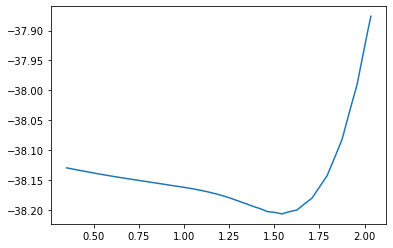

In [28]:
plt.plot(particles['lon'][0], particles['lat'][0]);

In [22]:
particles

<xarray.Dataset>
Dimensions:     (obs: 241, traj: 1)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 10.0 10.0 10.0 10.0 ... 10.0 10.0 10.0 10.0
    time        (traj, obs) datetime64[ns] 2000-01-03T12:00:00 ... 2000-01-13...
    lat         (traj, obs) float64 -38.13 -38.13 -38.13 ... -37.88 -37.88
    lon         (traj, obs) float64 0.35 0.3629 0.3758 ... 2.025 2.03 2.035
    z           (traj, obs) float64 1.0 0.999 0.9981 ... 0.9308 0.9279 0.9251
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

In [2]:
pkl.load('../data/NIOZ_sampling_locations.pkl')

TypeError: file must have 'read' and 'readline' attributes